# Task 7: stock market prediction 

Data Science & Business Analytics Intern

GRIP @The Sparks Foundation

   ##Name: Ashutosh Kumar

#GRIPMAY21 #TSF #DATASCIENCE #GRIP

Dataset: Download historical stock prices from finance.yahoo.com

DATASET : Download textual (news) data from https://bit.ly/36fFPI6

# Problem Statement: Stock to analyze and predict - SENSEX (S&P BSE SENSEX)

 Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices,and sentimental analysis of news headlines
 
 

## importing libraries and Datasets | Stock Price Data | Stock News Headlines Data

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
stock_price  = pd.read_csv('C:\AAP.csv')
stock_headlines = pd.read_csv('C:\india-news-headlines1.csv')

## data visualization and cleaning 

In [3]:
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,0.265625,0.272321,0.260045,0.265625,0.229537,452312000
1,2001-01-03,0.258929,0.297991,0.257813,0.292411,0.252684,817073600
2,2001-01-04,0.323940,0.330357,0.300223,0.304688,0.263292,739396000
3,2001-01-05,0.302455,0.310268,0.286830,0.292411,0.252684,412356000
4,2001-01-08,0.302455,0.303292,0.284598,0.295759,0.255577,373699200


In [4]:
 stock_headlines .head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [5]:
stock_price.shape

(4904, 7)

In [6]:
stock_headlines.shape

(3424067, 3)

In [7]:
stock_price.nunique()

Date         4904
Open         4485
High         4408
Low          4430
Close        4496
Adj Close    4569
Volume       4879
dtype: int64

In [8]:
stock_headlines.nunique()

publish_date            7262
headline_category       1013
headline_text        3168800
dtype: int64

In [9]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4904 entries, 0 to 4903
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4904 non-null   object 
 1   Open       4904 non-null   float64
 2   High       4904 non-null   float64
 3   Low        4904 non-null   float64
 4   Close      4904 non-null   float64
 5   Adj Close  4904 non-null   float64
 6   Volume     4904 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 268.3+ KB


In [10]:
stock_price.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,4904,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4.904000e+03
unique,4904,NaN,NaN,NaN,NaN,NaN,NaN
top,2006-07-10,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,17.135265,17.309201,16.964766,17.144485,16.094308,4.512824e+08
std,NaN,18.661107,18.863630,18.490313,18.691363,18.379233,3.848283e+08
min,NaN,0.231964,0.235536,0.227143,0.234286,0.202455,3.247000e+07
25%,NaN,2.043482,2.068661,2.016875,2.041339,1.764001,1.778427e+08
50%,NaN,10.355893,10.424285,10.214286,10.323750,8.921155,3.381448e+08
75%,NaN,27.269375,27.557501,27.044375,27.290000,25.435794,6.034350e+08


In [11]:
stock_price.isna().any(), stock_headlines .isna().any()

(Date         False
 Open         False
 High         False
 Low          False
 Close        False
 Adj Close    False
 Volume       False
 dtype: bool,
 publish_date         False
 headline_category    False
 headline_text        False
 dtype: bool)

In [12]:
stock_price.drop_duplicates()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,0.265625,0.272321,0.260045,0.265625,0.229537,452312000
1,2001-01-03,0.258929,0.297991,0.257813,0.292411,0.252684,817073600
2,2001-01-04,0.323940,0.330357,0.300223,0.304688,0.263292,739396000
3,2001-01-05,0.302455,0.310268,0.286830,0.292411,0.252684,412356000
4,2001-01-08,0.302455,0.303292,0.284598,0.295759,0.255577,373699200
...,...,...,...,...,...,...,...
4899,2020-06-24,91.250000,92.197502,89.629997,90.014999,89.852997,192623200
4900,2020-06-25,90.175003,91.250000,89.392502,91.209999,91.045845,137522400
4901,2020-06-26,91.102501,91.330002,88.254997,88.407501,88.248390,205256800
4902,2020-06-29,88.312500,90.542503,87.820000,90.445000,90.282219,130646000


In [13]:
stock_headlines .drop_duplicates()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...


## analyzing each attributes and  computing current  data 

In [14]:
stock_price = stock_price.drop_duplicates()
stock_price['Date'] = pd.to_datetime(stock_price['Date']).dt.normalize()
stock_price = stock_price.filter(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'])
stock_price.set_index('Date', inplace= True)
stock_price = stock_price.sort_index(ascending=True, axis=0)
stock_price

,Close,Open,High,Low,Volume
Date,,,,,
2001-01-02,0.265625,0.265625,0.272321,0.260045,452312000
2001-01-03,0.292411,0.258929,0.297991,0.257813,817073600
2001-01-04,0.304688,0.323940,0.330357,0.300223,739396000
2001-01-05,0.292411,0.302455,0.310268,0.286830,412356000
2001-01-08,0.295759,0.302455,0.303292,0.284598,373699200
...,...,...,...,...,...
2020-06-24,90.014999,91.250000,92.197502,89.629997,192623200
2020-06-25,91.209999,90.175003,91.250000,89.392502,137522400
2020-06-26,88.407501,91.102501,91.330002,88.254997,205256800


In [15]:

stock_headlines = stock_headlines.drop_duplicates()
stock_headlines['publish_date'] = stock_headlines['publish_date'].astype(str)
stock_headlines['publish_date'] = stock_headlines['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
stock_headlines['publish_date'] = pd.to_datetime(stock_headlines['publish_date']).dt.normalize()
stock_headlines = stock_headlines.filter(['publish_date', 'headline_text'])
stock_headlines = stock_headlines.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()
stock_headlines.set_index('publish_date', inplace= True)
stock_headlines = stock_headlines.sort_index(ascending=True, axis=0)
stock_headlines

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...
...,...
2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
2020-12-28,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,Man recovers charred remains of 'thief' from h...


In [16]:
stock_data = pd.concat([stock_price, stock_headlines], axis=1)
stock_data.dropna(axis=0, inplace=True)
stock_data

,Close,Open,High,Low,Volume,headline_text
2001-01-02,0.265625,0.265625,0.272321,0.260045,452312000.0,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,0.292411,0.258929,0.297991,0.257813,817073600.0,"Powerless north India gropes in the dark,Think..."
2001-01-04,0.304688,0.323940,0.330357,0.300223,739396000.0,The string that pulled Stephen Hawking to Indi...
2001-01-05,0.292411,0.302455,0.310268,0.286830,412356000.0,Light combat craft takes India into club class...
2001-01-08,0.295759,0.302455,0.303292,0.284598,373699200.0,"Sangh Parivar; Babri panel up the ante,Frontru..."
...,...,...,...,...,...,...
2020-06-24,90.014999,91.250000,92.197502,89.629997,192623200.0,I never thought I had a voice until today: Vid...
2020-06-25,91.209999,90.175003,91.250000,89.392502,137522400.0,Truck firms look for new export markets to sel...
2020-06-26,88.407501,91.102501,91.330002,88.254997,205256800.0,Containment zone residents slam high prices ch...
2020-06-29,90.445000,88.312500,90.542503,87.820000,130646000.0,6 hot and stylish bikini looks of Katrina Kaif...


# predicting the future data based on past 

In [17]:
# adding empty sentiment columns to stock_data for later calculation
stock_data['compound'] = ''
stock_data['negative'] = ''
stock_data['neutral'] = ''
stock_data['positive'] = ''
stock_data.head()

,Close,Open,High,Low,Volume,headline_text,compound,negative,neutral,positive
2001-01-02,0.265625,0.265625,0.272321,0.260045,452312000.0,Status quo will not be disturbed at Ayodhya; s...,,,,
2001-01-03,0.292411,0.258929,0.297991,0.257813,817073600.0,"Powerless north India gropes in the dark,Think...",,,,
2001-01-04,0.304688,0.323940,0.330357,0.300223,739396000.0,The string that pulled Stephen Hawking to Indi...,,,,
2001-01-05,0.292411,0.302455,0.310268,0.286830,412356000.0,Light combat craft takes India into club class...,,,,
2001-01-08,0.295759,0.302455,0.303292,0.284598,373699200.0,"Sangh Parivar; Babri panel up the ante,Frontru...",,,,


Text(0, 0.5, 'Close Price ($)')

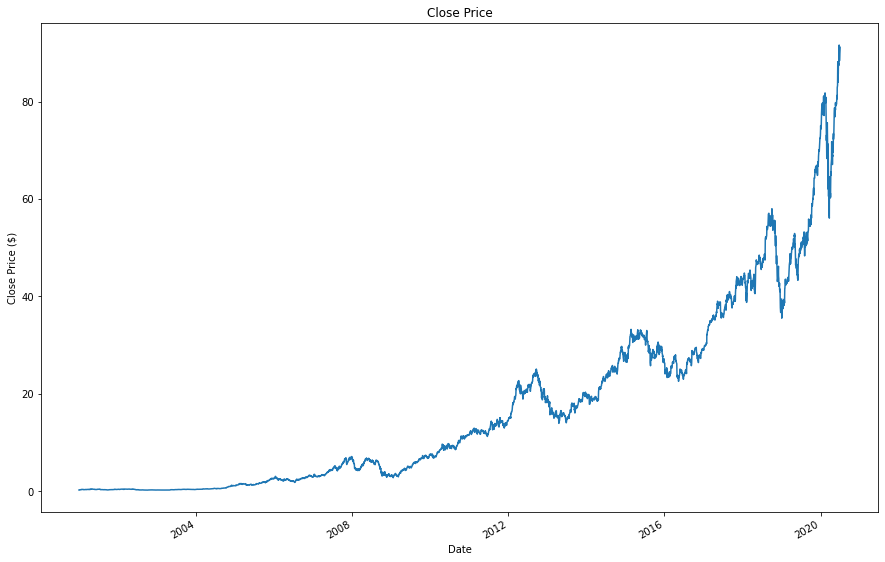

In [18]:
plt.figure(figsize=(15,10))
stock_price['Close'].plot()
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')

In [19]:
stock_price.rolling(7).mean().head(20)

,Close,Open,High,Low,Volume
Date,,,,,
2001-01-02,NaN,NaN,NaN,NaN,NaN
2001-01-03,NaN,NaN,NaN,NaN,NaN
2001-01-04,NaN,NaN,NaN,NaN,NaN
2001-01-05,NaN,NaN,NaN,NaN,NaN
2001-01-08,NaN,NaN,NaN,NaN,NaN
2001-01-09,NaN,NaN,NaN,NaN,NaN
2001-01-10,0.293368,0.293088,0.304687,0.281728,566364000.0
2001-01-11,0.301340,0.296596,0.312978,0.286033,616567200.0
2001-01-12,0.303412,0.305206,0.316326,0.292730,560324800.0


<AxesSubplot:xlabel='Date'>

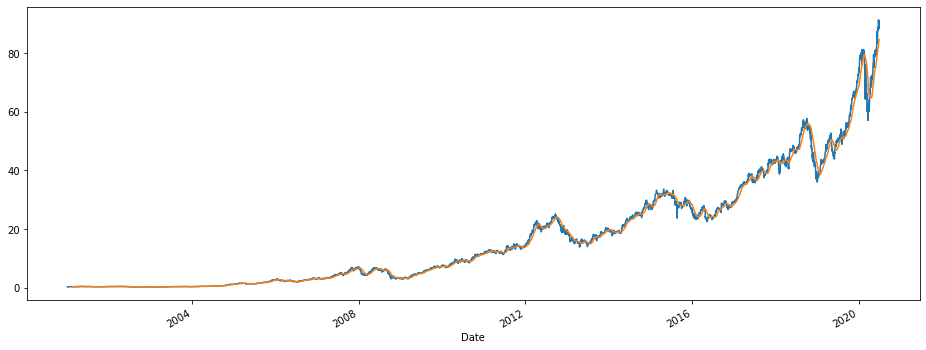

In [20]:
stock_price['Open'].plot(figsize=(16,6))
stock_price.rolling(window=30).mean()['Close'].plot()

In [21]:
stock_price=stock_price.reset_index()['Close']

In [22]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
stock_price=scaler.fit_transform(np.array(stock_price).reshape(-1,1))

In [23]:
print(stock_price)

[[3.42884162e-04]
 [6.35953346e-04]
 [7.70277634e-04]
 ...
 [9.64714858e-01]
 [9.87007405e-01]
 [9.95267927e-01]]


In [24]:
training_size=int(len(stock_price)*0.65)
test_size=len(stock_price)-training_size
train_data,test_data=stock_price[0:training_size,:],stock_price[training_size:len(stock_price),:1]

In [25]:
training_size,test_size

(3187, 1717)

In [26]:
train_data

array([[0.00034288],
       [0.00063595],
       [0.00077028],
       ...,
       [0.18782018],
       [0.1883516 ],
       [0.19230214]])

In [27]:
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_price)-1))
train_end = int(data_to_use*0.8)
total_data = len(stock_price)
start = total_data - data_to_use
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 3922
Number of records in Test Data: 982


In [28]:
import numpy 
def create_stock_price(stock_price, time_step = 1):
    dataX, dataY = [],[]
    for i  in range (len(stock_price)-time_step-1):
        a = stock_price[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(stock_price[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [29]:
time_step = 100
X_train, y_train = create_stock_price(train_data, time_step)
X_test, ytest = create_stock_price(test_data, time_step)

In [30]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [31]:

X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (3086, 100, 1, 1)
Shape of Test set X: (1616, 100, 1, 1)


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 3900
Number of records in Test Data: 976


In [36]:
steps_to_predict = 1
close_price = stock_data.iloc[start:total_data,0] 
compound = stock_data.iloc[start:total_data,1]
negative = stock_data.iloc[start:total_data,2] 
neutral = stock_data.iloc[start:total_data,3] 
positive = stock_data.iloc[start:total_data,4] 
open_price = stock_data.iloc[start:total_data,5] 
high = stock_data.iloc[start:total_data,6] 
low = stock_data.iloc[start:total_data,7]
volume = stock_data.iloc[start:total_data,8] 
print("Close Price:")
close_price

Close Price:


2001-01-03     0.292411
2001-01-04     0.304688
2001-01-05     0.292411
2001-01-08     0.295759
2001-01-09     0.306920
                ...    
2020-06-24    90.014999
2020-06-25    91.209999
2020-06-26    88.407501
2020-06-29    90.445000
2020-06-30    91.199997
Name: Close, Length: 4875, dtype: float64

In [38]:
import tensorflow as tf

In [39]:
tf.__version__

'2.4.1'

Text(0.5, 1.0, 'Visualize average, numberOf, min, max, std, Queartile')

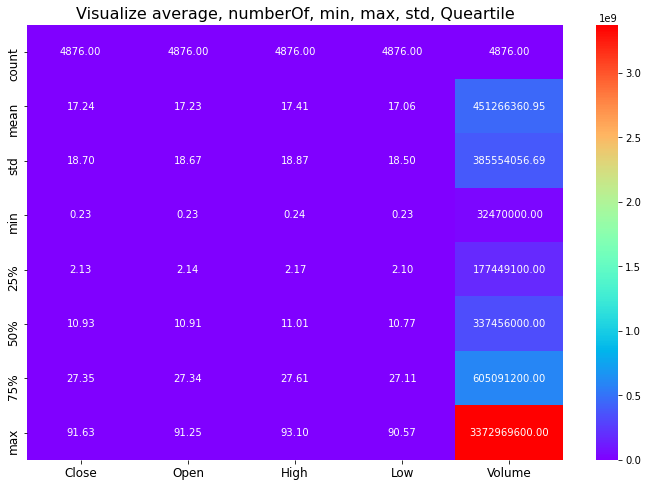

In [52]:
plt.figure(figsize=(12, 8))
sns.heatmap(stock_data.describe(), annot = True, fmt = '.2f', cmap = 'rainbow')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Visualize average, numberOf, min, max, std, Queartile", fontsize = 16)

##note  the efficiency of the model is low and can be further improved by adding more data to the database and code  over time 

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

# conclusion :- as per my analysis news headline data and  stock data  not matching more so not much usful for accurate  stock prediction 